# MOGDx 

In [14]:
import pandas as pd
import numpy as np
import os
import sys 

sys.path.insert(0 , './../')
from MAIN.utils import *
from MAIN.train import *
import MAIN.preprocess_functions
from MAIN.GNN_MME import GCN_MME , GSage_MME , GAT_MME

from Modules.PNetTorch.MAIN.reactome import ReactomeNetwork
from Modules.PNetTorch.MAIN.Pnet import MaskedLinear , PNET
from Modules.PNetTorch.MAIN.utils import numpy_array_to_one_hot, get_gpu_memory
from Modules.PNetTorch.MAIN.interpret import interpret , evaluate_interpret_save , visualize_importances

import torch
import torch.nn.functional as F
import dgl
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import networkx as nx
from datetime import datetime
import joblib
import warnings
import gc

warnings.filterwarnings("ignore")

print("Finished Library Import \n")

Finished Library Import 



In [15]:
data_input = './../../data/raw/'
snf_net = 'RPPA_mRNA_graph.graphml'
index_col = 'index'
target = 'paper_BRCA_Subtype_PAM50'
interpret_feat = True
pnet = True

Using cuda device
Total = 6.4Gb 	 Reserved = 1.0Gb 	 Allocated = 0.4Gb
StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
GCN_MME(
  (encoder_dims): ModuleList(
    (0): PNET(
      (dropout): Dropout(p=0.5, inplace=False)
      (layers): ModuleList(
        (0): Linear(in_features=29995, out_features=723, bias=True)
        (1): MaskedLinear(in_features=723, out_features=1613, bias=True)
        (2): MaskedLinear(in_features=1613, out_features=1107, bias=True)
        (3): MaskedLinear(in_features=1107, out_features=488, bias=True)
        (4): MaskedLinear(in_features=488, out_features=159, bias=True)
        (5): MaskedLinear(in_features=159, out_features=28, bias=True)
      )
      (skip): ModuleList(
        (0): Linear(in_features=723, out_features=32, bias=True)
        (1): Linear(in_features=1613, out_features=32, bias=True)
        (2): Linear(in_features=1107, out_features=32, bias=True)
        (3): Linear(in_features=488, out_features=32, bias=True)
        (4):

Epoch 00430 | Loss 0.2303 | Train Acc. 0.9337 | 
Epoch 00435 | Loss 0.2273 | Train Acc. 0.9233 | 
Epoch 00440 | Loss 0.2175 | Train Acc. 0.9349 | 
Epoch 00445 | Loss 0.2342 | Train Acc. 0.9267 | 
Epoch 00450 | Loss 0.2214 | Train Acc. 0.9326 | 
Epoch 00455 | Loss 0.2330 | Train Acc. 0.9209 | 
Epoch 00460 | Loss 0.2367 | Train Acc. 0.9291 | 
Epoch 00465 | Loss 0.2298 | Train Acc. 0.9198 | 
Epoch 00470 | Loss 0.2298 | Train Acc. 0.9279 | 
Epoch 00475 | Loss 0.2260 | Train Acc. 0.9326 | 
Epoch 00480 | Loss 0.2280 | Train Acc. 0.9267 | 
Epoch 00485 | Loss 0.2350 | Train Acc. 0.9221 | 
Epoch 00490 | Loss 0.2367 | Train Acc. 0.9198 | 
Epoch 00495 | Loss 0.2320 | Train Acc. 0.9279 | 
Epoch 00500 | Loss 0.2245 | Train Acc. 0.9326 | 
Epoch 00505 | Loss 0.2347 | Train Acc. 0.9291 | 
Epoch 00510 | Loss 0.2302 | Train Acc. 0.9395 | 
Epoch 00515 | Loss 0.2311 | Train Acc. 0.9267 | 
Epoch 00520 | Loss 0.2321 | Train Acc. 0.9221 | 
Epoch 00525 | Loss 0.2329 | Train Acc. 0.9314 | 
Epoch 00530 | Loss 0

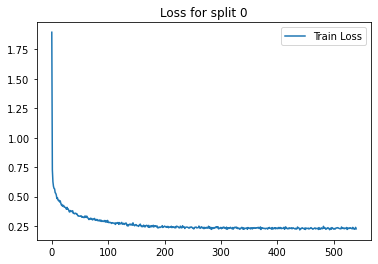

Fold : 1 | Test Accuracy = 0.8380 | F1 = 0.8029 
Save Path Not Found - Plots will not be saved
Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Save Path Not Found - Plots will not be saved
Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Total = 6.4Gb 	 Reserved = 1.7Gb 	 Allocated = 0.4Gb
Clearing gpu memory
Total = 6.4Gb 	 Reserved = 1.1Gb 	 Allocated = 0.4Gb
GCN_MME(
  (encoder_dims): Mo

Epoch 00345 | Loss 0.2587 | Train Acc. 0.9129 | 
Epoch 00350 | Loss 0.2599 | Train Acc. 0.9141 | 
Epoch 00355 | Loss 0.2617 | Train Acc. 0.9280 | 
Epoch 00360 | Loss 0.2624 | Train Acc. 0.9059 | 
Epoch 00365 | Loss 0.2791 | Train Acc. 0.9048 | 
Epoch 00370 | Loss 0.2708 | Train Acc. 0.9071 | 
Epoch 00375 | Loss 0.2617 | Train Acc. 0.9117 | 
Epoch 00380 | Loss 0.2666 | Train Acc. 0.9071 | 
Epoch 00385 | Loss 0.2598 | Train Acc. 0.9187 | 
Epoch 00390 | Loss 0.2634 | Train Acc. 0.9071 | 
Epoch 00395 | Loss 0.2595 | Train Acc. 0.9141 | 
Epoch 00400 | Loss 0.2630 | Train Acc. 0.9059 | 
Early stopping! No improvement for 100 consecutive epochs.


<Figure size 432x288 with 0 Axes>

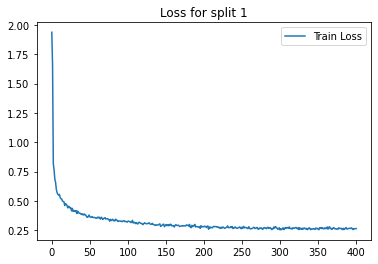

Fold : 2 | Test Accuracy = 0.8465 | F1 = 0.8152 
Save Path Not Found - Plots will not be saved
Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Save Path Not Found - Plots will not be saved
Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Total = 6.4Gb 	 Reserved = 1.5Gb 	 Allocated = 0.4Gb
Clearing gpu memory
Total = 6.4Gb 	 Reserved = 1.0Gb 	 Allocated = 0.4Gb
GCN_MME(
  (encoder_dims): Mo

Epoch 00345 | Loss 0.2439 | Train Acc. 0.9245 | 
Epoch 00350 | Loss 0.2497 | Train Acc. 0.9222 | 
Epoch 00355 | Loss 0.2494 | Train Acc. 0.9152 | 
Epoch 00360 | Loss 0.2468 | Train Acc. 0.9199 | 
Epoch 00365 | Loss 0.2594 | Train Acc. 0.9222 | 
Epoch 00370 | Loss 0.2482 | Train Acc. 0.9233 | 
Epoch 00375 | Loss 0.2579 | Train Acc. 0.9129 | 
Epoch 00380 | Loss 0.2447 | Train Acc. 0.9350 | 
Epoch 00385 | Loss 0.2516 | Train Acc. 0.9233 | 
Epoch 00390 | Loss 0.2496 | Train Acc. 0.9199 | 
Epoch 00395 | Loss 0.2483 | Train Acc. 0.9152 | 
Epoch 00400 | Loss 0.2462 | Train Acc. 0.9210 | 
Epoch 00405 | Loss 0.2564 | Train Acc. 0.9164 | 
Epoch 00410 | Loss 0.2403 | Train Acc. 0.9245 | 
Epoch 00415 | Loss 0.2434 | Train Acc. 0.9292 | 
Epoch 00420 | Loss 0.2534 | Train Acc. 0.9152 | 
Epoch 00425 | Loss 0.2609 | Train Acc. 0.9187 | 
Epoch 00430 | Loss 0.2559 | Train Acc. 0.9152 | 
Early stopping! No improvement for 100 consecutive epochs.


<Figure size 432x288 with 0 Axes>

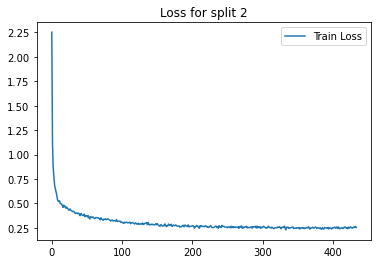

Fold : 3 | Test Accuracy = 0.8512 | F1 = 0.8183 
Save Path Not Found - Plots will not be saved
Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Save Path Not Found - Plots will not be saved
Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Total = 6.4Gb 	 Reserved = 1.5Gb 	 Allocated = 0.4Gb
Clearing gpu memory
Total = 6.4Gb 	 Reserved = 1.1Gb 	 Allocated = 0.4Gb
GCN_MME(
  (encoder_dims): Mo

Epoch 00345 | Loss 0.2485 | Train Acc. 0.9117 | 
Epoch 00350 | Loss 0.2486 | Train Acc. 0.9222 | 
Epoch 00355 | Loss 0.2460 | Train Acc. 0.9141 | 
Epoch 00360 | Loss 0.2437 | Train Acc. 0.9245 | 
Early stopping! No improvement for 100 consecutive epochs.


<Figure size 432x288 with 0 Axes>

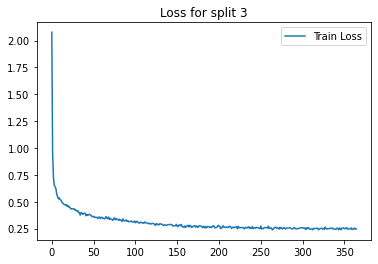

Fold : 4 | Test Accuracy = 0.8605 | F1 = 0.8377 
Save Path Not Found - Plots will not be saved
Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Save Path Not Found - Plots will not be saved
Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Total = 6.4Gb 	 Reserved = 1.5Gb 	 Allocated = 0.4Gb
Clearing gpu memory
Total = 6.4Gb 	 Reserved = 1.2Gb 	 Allocated = 0.4Gb
GCN_MME(
  (encoder_dims): Mo

Epoch 00345 | Loss 0.2996 | Train Acc. 0.9094 | 
Epoch 00350 | Loss 0.3073 | Train Acc. 0.9071 | 
Epoch 00355 | Loss 0.3087 | Train Acc. 0.9094 | 
Epoch 00360 | Loss 0.2942 | Train Acc. 0.9141 | 
Epoch 00365 | Loss 0.2919 | Train Acc. 0.9141 | 
Epoch 00370 | Loss 0.3047 | Train Acc. 0.9013 | 
Epoch 00375 | Loss 0.2992 | Train Acc. 0.9129 | 
Epoch 00380 | Loss 0.2912 | Train Acc. 0.9164 | 
Epoch 00385 | Loss 0.3084 | Train Acc. 0.9129 | 
Epoch 00390 | Loss 0.3047 | Train Acc. 0.9106 | 
Epoch 00395 | Loss 0.3011 | Train Acc. 0.9013 | 
Epoch 00400 | Loss 0.3012 | Train Acc. 0.9071 | 
Epoch 00405 | Loss 0.3124 | Train Acc. 0.8920 | 
Epoch 00410 | Loss 0.3071 | Train Acc. 0.8955 | 
Epoch 00415 | Loss 0.2970 | Train Acc. 0.9129 | 
Early stopping! No improvement for 100 consecutive epochs.


<Figure size 432x288 with 0 Axes>

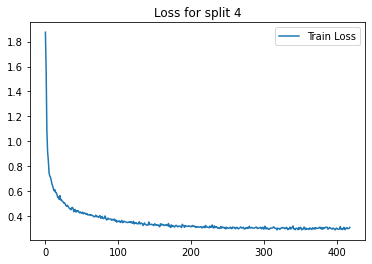

Fold : 5 | Test Accuracy = 0.8837 | F1 = 0.8644 
Save Path Not Found - Plots will not be saved
Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Save Path Not Found - Plots will not be saved
Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)
Total = 6.4Gb 	 Reserved = 1.5Gb 	 Allocated = 0.4Gb
Clearing gpu memory
Total = 6.4Gb 	 Reserved = 1.2Gb 	 Allocated = 0.4Gb
5 Fold Cross Validation Accur

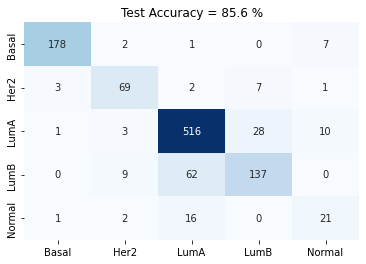

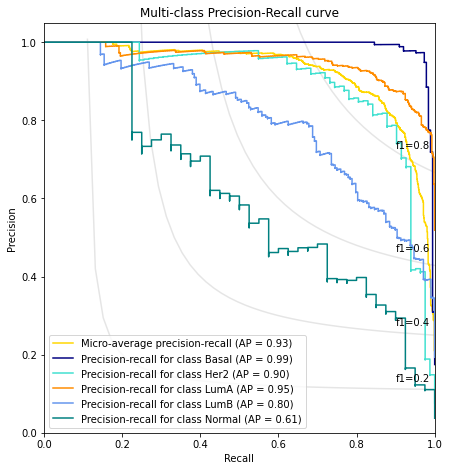

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')# Get GPU device name, else use CPU
print("Using %s device" % device)
get_gpu_memory()

datModalities , meta = data_parsing(data_input , ['mRNA', 'RPPA' ] , target , index_col)

if interpret_feat : 
    features = {}
    for i , mod in enumerate(datModalities) : 
        features[i] = list(datModalities[mod].columns)
        
if pnet : 
    # List of cancer genes was taken from the PNet paper dataset
    genes = pd.read_csv('./../../data/ext_data/cancer_genes.txt', header=0)

    # Build network to obtain gene and pathway relationships
    net = ReactomeNetwork(genes_of_interest=np.unique(list(genes['genes'].values)) , n_levels=5)

graph_file = data_input + '../Networks/' + snf_net
g = nx.read_graphml(graph_file)

meta = meta.loc[sorted(meta.index)]
label = F.one_hot(torch.Tensor(list(meta.astype('category').cat.codes)).to(torch.int64))

skf = StratifiedKFold(n_splits=5 , shuffle=True) 

print(skf)

MME_input_shapes = [ datModalities[mod].shape[1] for mod in datModalities]

h = reduce(merge_dfs , list(datModalities.values()))
h = h.loc[sorted(h.index)]

g = dgl.from_networkx(g , node_attrs=['idx' , 'label'])

g.ndata['feat'] = torch.Tensor(h.to_numpy())

g.ndata['label'] = label

del datModalities
gc.collect()

output_metrics = []
test_logits = []
test_labels = []
for i, (train_index, test_index) in enumerate(skf.split(meta.index, meta)) :

    model = GCN_MME(MME_input_shapes , [16 , 32] , 32 , [16]  , len(meta.unique()), PNet=net).to(device)
    
    print(model)
    print(g)
    
    g = g.to(device)

    loss_plot = train(g, train_index, device ,  model , label , 2000 , 1e-3 , 100)
    plt.title(f'Loss for split {i}')
    plt.show()
    plt.clf()
    
    sampler = NeighborSampler(
        [15 for i in range(len(model.gnnlayers))],  # fanout for each layer
        prefetch_node_feats=['feat'],
        prefetch_labels=['label'],
    )
    test_dataloader = DataLoader(
        g,
        torch.Tensor(test_index).to(torch.int64).to(device),
        sampler,
        device=device,
        batch_size=1024,
        shuffle=True,
        drop_last=False,
        num_workers=0,
        use_uva=False,
    )
    
    test_output_metrics = evaluate(model , g, test_dataloader)

    print(
        "Fold : {:01d} | Test Accuracy = {:.4f} | F1 = {:.4f} ".format(
        i+1 , test_output_metrics[1] , test_output_metrics[2] )
    )
    
    test_logits.extend(test_output_metrics[-2])
    test_labels.extend(test_output_metrics[-1])
    
    output_metrics.append(test_output_metrics)
    if i == 0 : 
        best_model = model
        best_idx = i
    elif output_metrics[best_idx][1] < test_output_metrics[1] : 
        best_model = model
        best_idx   = i

    if interpret_feat : 
        prev_dim = 0
        for i_int , (pnet , dim) in enumerate(zip(model.encoder_dims , model.input_dims)) : 
            
            pnet.features = features[i_int]
            
            x = g.ndata['feat'][torch.Tensor(test_index).to(device).to(torch.int) , prev_dim:dim+prev_dim]
        
            if i_int == 0 :
                model_importances_cv = interpret(pnet , x , savedir='None' , plot=False)
                for layer in model_importances_cv.keys() : 
                    model_importances_cv[layer] = model_importances_cv[layer].fillna(0)
                model_importances_cv['Features'] = (model_importances_cv['Features'] - model_importances_cv['Features'].mean().mean())/model_importances_cv['Features'].mean().std()
                model_importances_cv['Features'] = model_importances_cv['Features'].abs().mean(axis=0)
            else : 
                model_importances_tmp = interpret(pnet , x , savedir='None', plot=False)
                model_importances_tmp['Features'] = (model_importances_tmp['Features'] - model_importances_tmp['Features'].mean().mean())/model_importances_tmp['Features'].mean().std()
                model_importances_tmp['Features'] = model_importances_tmp['Features'].abs().mean(axis=0)
                for layer in model_importances_cv.keys() : 
                    model_importances_tmp[layer] = model_importances_tmp[layer].fillna(0)
                    if layer == 'Features' : 
                        model_importances_cv[layer] = pd.concat([model_importances_cv[layer] , model_importances_tmp[layer]])
                    else : 
                        model_importances_cv[layer] += model_importances_tmp[layer]
        
            prev_dim += dim
            
        model_importances_cv = {k: (v.divide(i_int+1) if k != 'Features' else v) for k, v in model_importances_cv.items()}
        if i == 0 : 
            model_importances = model_importances_cv
        else : 
            for layer in model_importances.keys() :
                if layer == 'Features' : 
                    model_importances[layer] +=  model_importances_cv[layer]
                else : 
                    model_importances[layer] = pd.concat([model_importances[layer] , model_importances_cv[layer]] , axis=0).reset_index(drop=True)

    get_gpu_memory()
    del model
    gc.collect()
    torch.cuda.empty_cache()
    print('Clearing gpu memory')
    get_gpu_memory()

test_logits = torch.stack(test_logits)
test_labels = torch.stack(test_labels)
if interpret_feat : 
    model_importances = {k: (v.divide(i+1)) for k, v in model_importances.items()}
    
accuracy = []
F1 = []
i = 0
for metric in output_metrics :
    
    accuracy.append(metric[1])
    F1.append(metric[2])


print("%i Fold Cross Validation Accuracy = %2.2f \u00B1 %2.2f" %(5 , np.mean(accuracy)*100 , np.std(accuracy)*100))
print("%i Fold Cross Validation F1 = %2.2f \u00B1 %2.2f" %(5 , np.mean(F1)*100 , np.std(F1)*100))

confusion_matrix(test_logits , test_labels , meta.astype('category').cat.categories)
plt.title('Test Accuracy = %2.1f %%' % (np.mean(accuracy)*100))

precision_recall_plot , all_predictions_conf = AUROC(test_logits, test_labels , meta)

node_predictions = []
node_true        = []
display_label = meta.astype('category').cat.categories
for pred , true in zip(all_predictions_conf.argmax(1) , list(test_labels.detach().cpu().argmax(1).numpy()))  : 
    node_predictions.append(display_label[pred])
    node_true.append(display_label[true])

preds = pd.DataFrame({'Actual' : node_true , 'Predicted' : node_predictions})

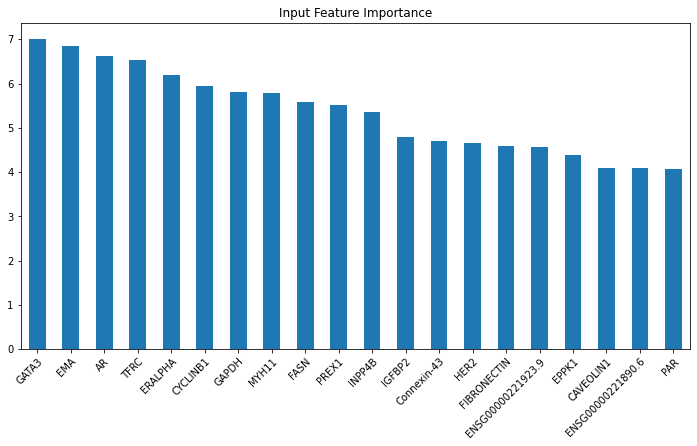

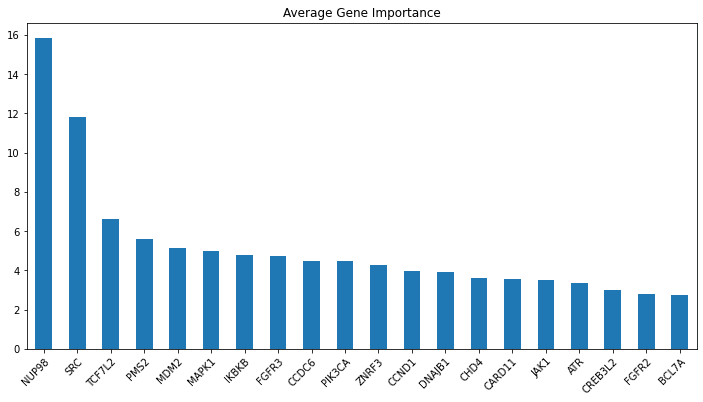

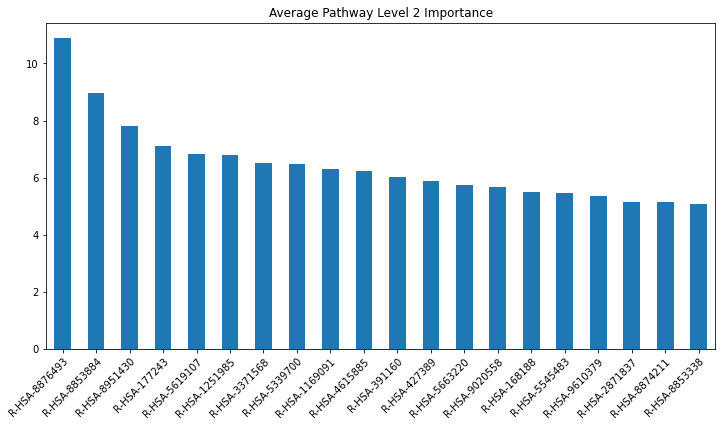

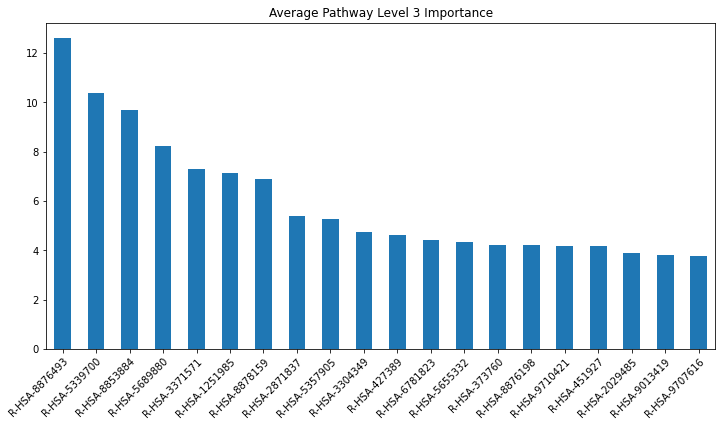

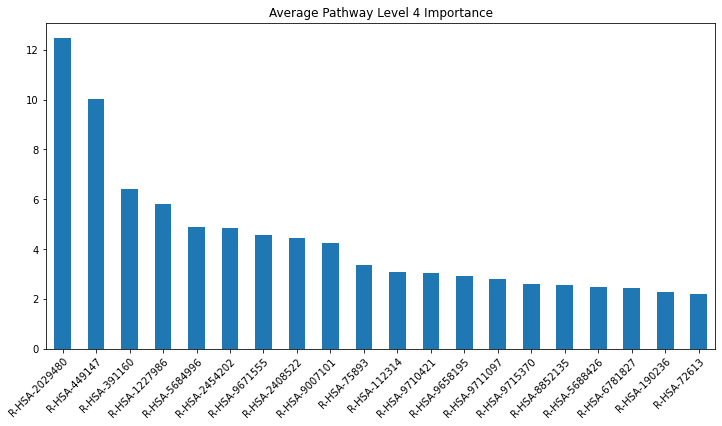

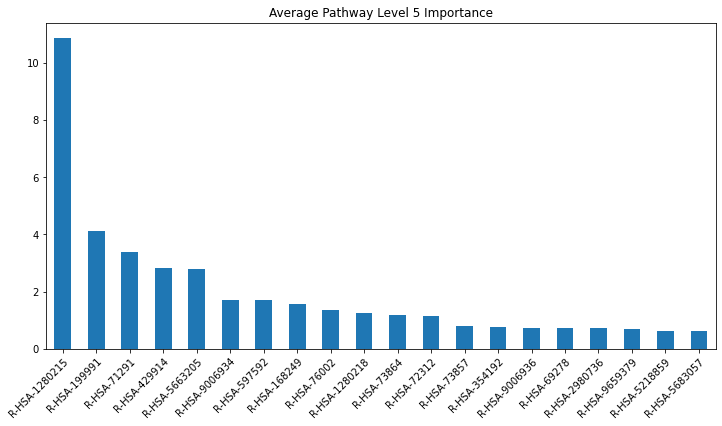

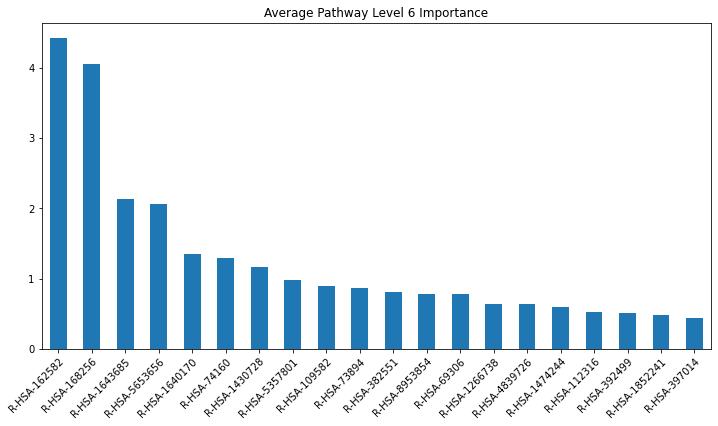

In [33]:
model_layers_importance = {}
model_layers_importance_fig= {}
for i, layer in enumerate(model_importances):
    if i == 0 :
        fig = plt.figure(figsize=(12,6))
        model_importances['Features'].sort_values(ascending=False)[:20].plot(kind='bar')
        plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
        plt.title('Input Feature Importance')
        plt.show()
        model_layers_importance_fig['Feature Importance'] = fig
    else : 
        layer_title = f"Pathway Level {i} Importance" if i > 1 else "Gene Importance"
        model_layers_importance[layer_title] = layer
        model_layers_importance_fig[layer_title] = visualize_importances(
            model_importances[layer], title=f"Average {layer_title}")

In [21]:
importances = model_importances['Gene Importance']
importances = (importances - importances.mean().mean())/importances.mean().std()
importances = importances.abs().mean(axis=0)
gse = importances.sort_values(ascending=False).reset_index()
gse.columns = ['ids' , 'score']
gse.to_csv('C:/Users/Barry/Downloads/gene_enrichment.rnk' , sep='\t' , header=True , index = False)

In [27]:
get_gpu_memory()
#del model , train_loader , test_loader
torch.cuda.reset_accumulated_memory_stats()
gc.collect()
torch.cuda.empty_cache()
get_gpu_memory()

Total = 6.4Gb 	 Reserved = 1.2Gb 	 Allocated = 0.4Gb
Total = 6.4Gb 	 Reserved = 1.2Gb 	 Allocated = 0.4Gb


In [28]:
# test the model
print("Testing...")
acc = layerwise_infer(
    device, g, np.arange(len(g.nodes())), best_model, batch_size=4096
)
print("Test Accuracy {:.4f}".format(acc.item()))

Testing...


100%|██████████| 1/1 [00:00<00:00, 36.35it/s]

Test Accuracy 0.9089


100%|██████████| 1/1 [00:00<00:00, 44.48it/s]


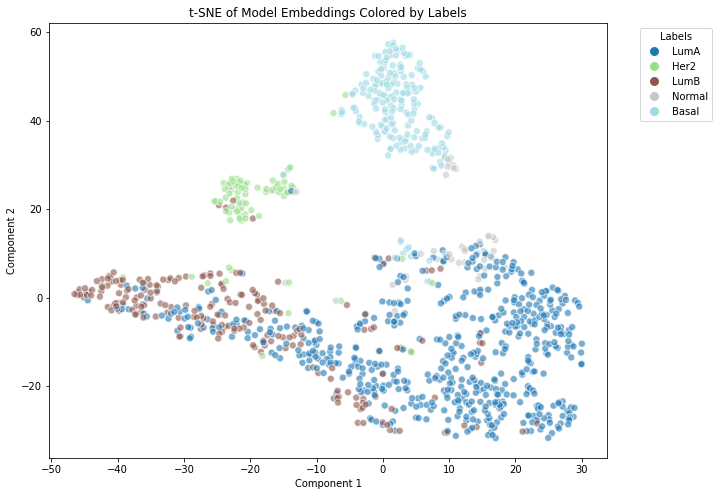

In [29]:
best_model.eval()
with torch.no_grad():
    emb = best_model.embedding_extraction(
        g, g.ndata['feat'] ,device, 4096
    )  # pred in buffer_device

tsne_embedding_plot(emb.detach().cpu().numpy() , meta)